In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Shanghai-order-gulf-12/22
col = list(range(0,12))
df1= pd.read_csv('/Users/serenazhang/Desktop/didi_project/order_sh_22_gulf',header=None, usecols=col,
                 sep=',',
                 names=['order_id','driver_id','car_id','city','start_long','start_lat',
                        'end_long','end_lat','start_time','end_time','type','label'])


In [15]:
# Shanghai-order-taxi-12/22
col = list(range(0,12))
df2= pd.read_csv('/Users/serenazhang/Desktop/didi_project/order_sh_22_taxi',
                               header=None, usecols=col,sep=',',
                               names=['order_id','driver_id','car_id','city','start_long','start_lat',
                                      'end_long','end_lat','start_time','end_time','type','label'])

In [16]:
#changing time column to datetime object
df1.start_time=pd.to_datetime(df1.start_time)
df1.end_time=pd.to_datetime(df1.end_time)
#df2.start_time=pd.to_datetime(df2.start_time)
#df2.end_time=pd.to_datetime(df2.end_time)

In [17]:
#add column "cnt_of_same_trip" for number of occurence of same label given label number
df1['cnt_of_same_trip'] = df1.groupby(['label'])["label"].transform('count')
k=df1["cnt_of_same_trip"].value_counts().reset_index().rename(
    columns={'index': 'cnt_of_same_trips', "cnt_of_same_trip": 'count'})

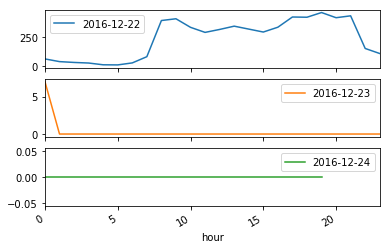

In [18]:
#group number of shared rides by hour
grouped=df1.groupby(pd.TimeGrouper(key='start_time', freq='H'))["label"].apply(lambda x:(x >0).sum())

#rename columns and add "date","hour" columns
shared_by_hour=grouped.reset_index().rename(columns={"label":"cnt_of_shared"})
shared_by_hour["date"],shared_by_hour["hour"]=shared_by_hour.start_time.dt.date,shared_by_hour.start_time.dt.hour

#convert to pivot table and plot number of ride sharing by hour
shared_by_hour=shared_by_hour.pivot(index="hour", columns="date", values="cnt_of_shared")
shared_by_hour.iloc[:, 0:4].plot(subplots=True)
plt.show()


In [19]:
#--------ignore everything below--------------
#len(np.unique(gps_beijing.drive_id))
#gps_beijing.loc[gps_beijing.drive_id.isin(['0010ca8e353bfef088d5988c8dbd8c3d']),]
#gulf.to_pickle('/Users/serehazhang/Desktop/didi_project/gulf')
#taxi.to_pickle('/Users/serenazhang/Desktop/didi_project/taxi')
# combine dataframs
#frames = [bj_gulf_22, bj_gulf_23,bj_gulf_24]
#bj_gulf = pd.concat(frames)